In [1]:
print("hi")

hi


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
File = './TestCSV.csv'
File_source = '../Project/nypd-motor-vehicle-collisions.csv'

In [56]:
df2 = pd.read_csv(File_source)

/tmp/ipykernel_6074/77816593.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(File_source)


In [57]:
df = pd.read_csv(File)

In [63]:
print(df)

             ACCIDENT DATE ACCIDENT TIME    BOROUGH ZIP CODE   LATITUDE  \
0  2019-08-05T00:00:00.000         16:30     QUEENS  11434.0  40.676052   
1  2019-08-27T00:00:00.000         16:02   BROOKLYN  11225.0  40.657780   
2  2019-08-15T00:00:00.000         17:57  MANHATTAN  10002.0  40.718143   
3  2019-08-30T00:00:00.000         21:53      BRONX  10460.0  40.840534   
4  2019-08-06T00:00:00.000          9:45  MANHATTAN  10016.0  40.745440   
5  2019-08-29T00:00:00.000         12:28   BROOKLYN  11222.0  40.726524   
6  2019-08-31T00:00:00.000          2:16     QUEENS  11434.0  40.667522   
7  2019-08-11T00:00:00.000         22:23        NaN      NaN  40.858210   
8  2019-08-02T00:00:00.000         16:30     QUEENS  11434.0  40.666492   
9  2019-08-21T00:00:00.000         17:30      BRONX  10452.0  40.837720   

   LONGITUDE                                           LOCATION  \
0 -73.790184  {'type': 'Point', 'coordinates': [-73.790184, ...   
1 -73.951096  {'type': 'Point', 'coordin

In [60]:
del df['Hellow']

In [12]:
nowe_dane = pd.DataFrame({'Hellow': ['hi1', 'hi2', 'hi3']})

df = pd.concat([df, nowe_dane], ignore_index=True)

df.to_csv(File, index=False)

In [24]:
# nowe_dane2 = pd.DataFrame({'Hello': ['There1','There2','There3']})
nowe_dane2 = pd.Series(['There1', 'There2', 'There3'], name='Hello')
# df = pd.concat([df, nowe_dane2], ignore_index=True)
df.reset_index(drop=True, inplace=True)
df.loc[:2, 'Hello'] = nowe_dane2.values
df.to_csv(File, index=False)

In [61]:
df = df.drop(df.index)

In [62]:
df = pd.concat([df, df2.head(10)], ignore_index=True)

In [64]:
df.to_csv(File, index=False)

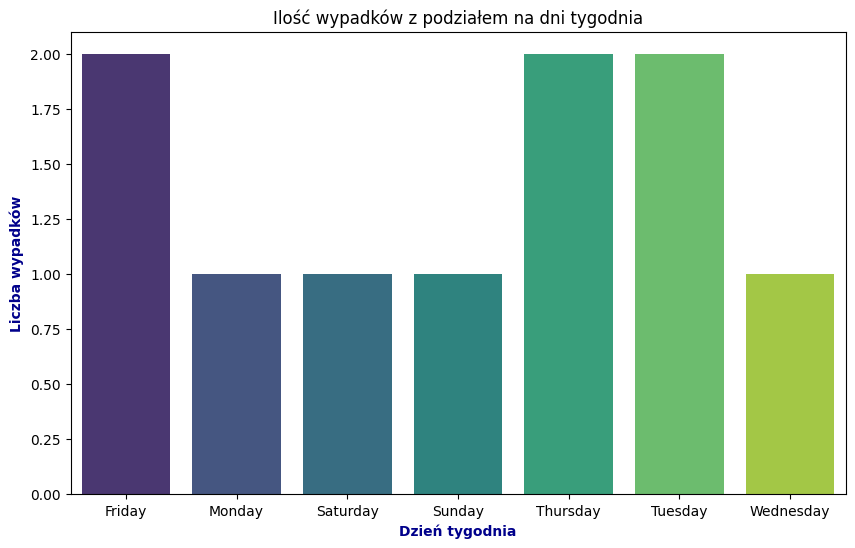

In [68]:
# ACCIDENT DATE na typ daty i DAY OF WEEK z nazwami dni tygodnia
df['ACCIDENT DATE'] = pd.to_datetime(df['ACCIDENT DATE'])
df['DAY OF WEEK'] = df['ACCIDENT DATE'].dt.day_name()

daily_counts = df['DAY OF WEEK'].value_counts()

daily_counts = daily_counts.sort_index()

# WYKRES
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='viridis')
plt.xlabel('Dzień tygodnia', fontweight='bold', color='darkblue')
plt.ylabel('Liczba wypadków', fontweight='bold', color='darkblue')
plt.title('Ilość wypadków z podziałem na dni tygodnia')

plt.show()